In [62]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

# MNIST tutorial Review
(Review of the topics covered this Tuesday)


In [63]:
import pickle
import pandas as pd

print('... loading data')
with open('./data/mnist.pkl', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

... loading data


In [64]:
train_x, train_y = train_set
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns = ['label'])
test_x =  pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns = ['label'])

train_data = pd.concat([train_x, train_y], axis=1)
test_data = pd.concat([test_x, test_y], axis=1)

print(train_data.shape, test_data.shape)

(50000, 785) (10000, 785)


In [65]:
print(train_data.shape)
train_data.head()

(50000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


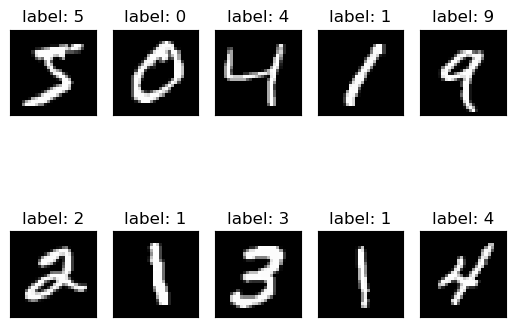

In [66]:
subset_images_X = train_data.iloc[:10,:-1]
subset_images_Y = train_data.iloc[:10, -1]

for i, row in subset_images_X.iterrows():
    ax = plt.subplot(2, 5, i+1)
    pixels = row.values.reshape((28,28)) # ndarray returned
    plt.imshow(pixels, cmap='gray')
    plt.title('label: {}'.format(subset_images_Y[i]))
    plt.xticks([])
    plt.yticks([])

## Exercise(1-2) – Template matching with MNIST data (0 and 1)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 

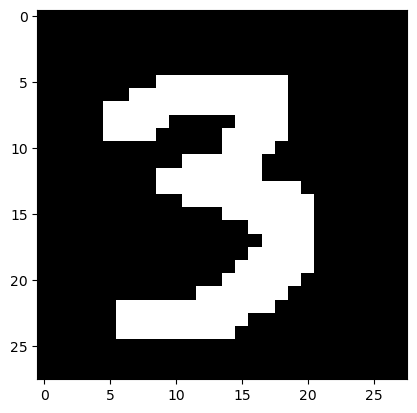

In [67]:
li = []
li = np.array([np.array([1 if pix!=0 else 0 for pix in train_x.iloc[i, :]]) for i in range(len(train_x))])
li.shape

image = li[10000, :].reshape((28, 28))
print(image)
plt.imshow(image, cmap='gray')

bin_train_x = pd.DataFrame(li)
bin_train = pd.concat([bin_train_x, train_y], axis=1)
print('binary train data shape: ', bin_train.shape)

In [68]:
li = []
li = np.array([np.array([1 if pix!=0 else 0 for pix in test_x.iloc[i, :]]) for i in range(len(test_x))])
li.shape

bin_test_x = pd.DataFrame(li)
bin_test = pd.concat([bin_test_x, test_y], axis=1)
print('binary test data shape: ', bin_test.shape)

binary test data shape:  (10000, 785)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

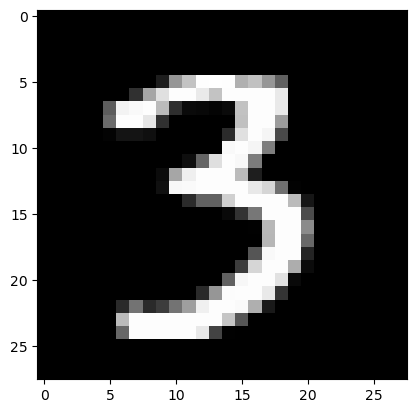

In [69]:
## check the original data
orig_img = train_x.iloc[10000, :].values.reshape((28, 28))
plt.imshow(orig_img, cmap='gray')
print(orig_img)

In [70]:
## Data with label 0 and data with label 1
train_0_data = bin_train[train_data['label']==0]
train_1_data = bin_train[train_data['label']==1]
train_01_data = pd.concat([train_0_data, train_1_data])

test_0_data = bin_test[test_y['label']==0]
test_1_data = bin_test[test_y['label']==1]
test_01_data = pd.concat([test_0_data, test_1_data])

In [71]:
print("train binary data shape: ", train_01_data.shape)
print("test binary data shape: ", test_01_data.shape)

train binary data shape:  (10610, 785)
test binary data shape:  (2115, 785)


In [72]:
def plot_images(img1, img2, img3, img4, img5):
    plt.figure(figsize=[30, 10])
    plt.subplot(151)
    plt.imshow(img1.values.reshape((28,28)), cmap='gray')
    plt.title('label-0 train data', fontsize=20)

    plt.subplot(152)
    plt.imshow(img2.values.reshape((28,28)), cmap='gray')
    plt.title('label-1 train data', fontsize=20)

    plt.subplot(153)
    plt.imshow(img5[:-1].values.reshape((28,28)), cmap='gray')
    plt.title('test data', fontsize=20)

    plt.subplot(154)
    plt.imshow(img3.reshape((28,28)), cmap='gray')
    plt.title('1st test data & label-0 train data', fontsize=20)

    plt.subplot(155)
    plt.imshow(img4.reshape((28,28)), cmap='gray')
    plt.title('1st test data & label-1 train data', fontsize=20)
    plt.show()

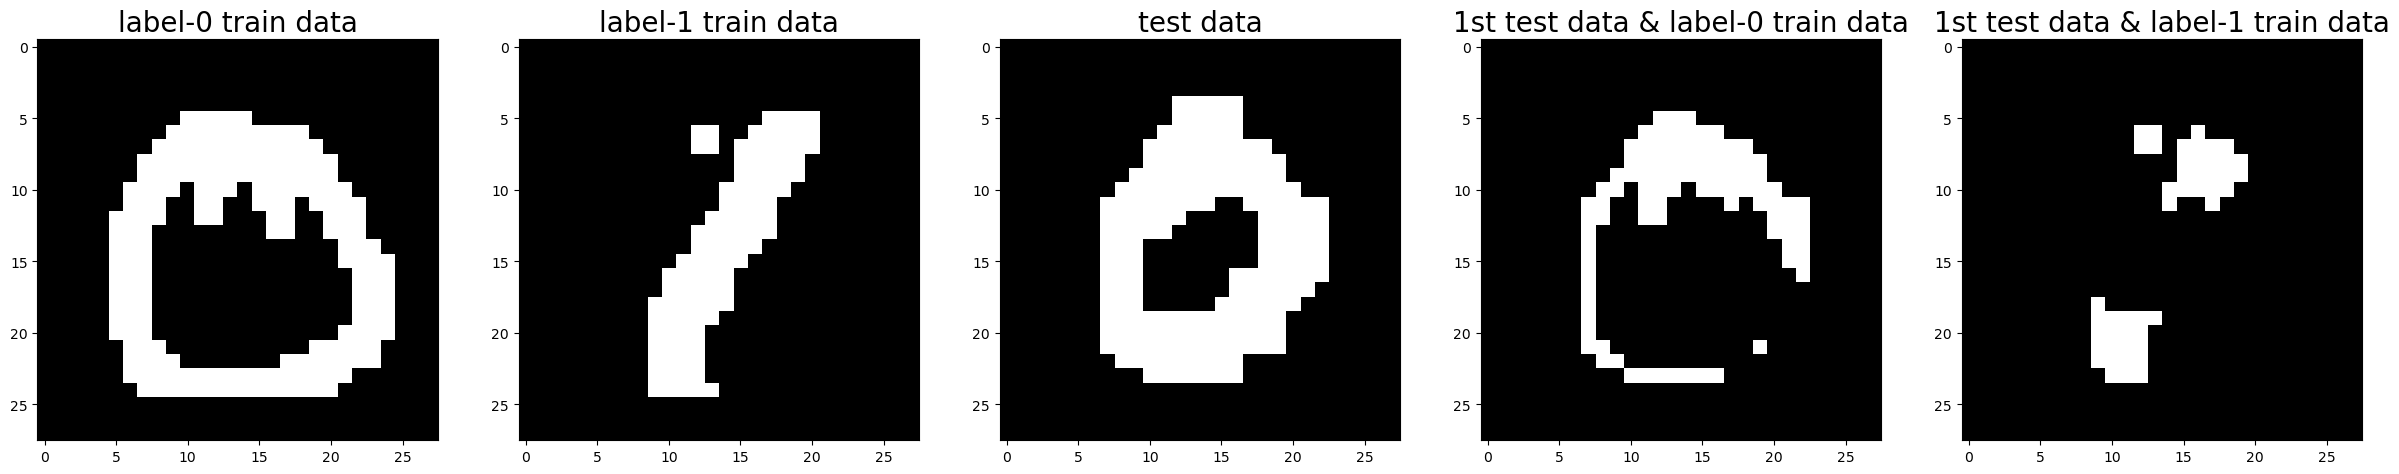

Num of 1s after AND with 0-label train data:  94
Num of 1s after AND with 1-label train data:  47
0 -label yields larger number, thus  1 th test image is classfied as  0  digit.


In [73]:
import numpy as np

# 1. Choose two representative images, randomly
tot_acc = 0
idx = 1000

subset_train_zero = train_0_data.iloc[idx, :-1]
subset_train_one = train_1_data.iloc[idx, :-1]

# 2. For each test data, apply template matching twice to label it with a label that has more than 1.
prediction = []

for i, (idx, test_data) in enumerate(test_01_data.iterrows()):
    tmp_match_zero = np.array([subset_train_zero.values & test_data[:-1]])#.reshape(28,28)
    tmp_match_one = np.array([subset_train_one.values & test_data[:-1]])#.reshape(28,28)

    prediction.append(0 if len(tmp_match_zero[tmp_match_zero==1]) > len(tmp_match_one[tmp_match_one==1]) else 1)

    if i==0:
        plot_images(subset_train_zero, subset_train_one, tmp_match_zero, tmp_match_one, test_data)

        print('Num of 1s after AND with 0-label train data: ', len(tmp_match_zero[tmp_match_zero==1]))
        print('Num of 1s after AND with 1-label train data: ', len(tmp_match_one[tmp_match_one==1]))
        print(prediction[0], '-label yields larger number, thus ', (i+1), 'th test image is classfied as ', prediction[0], ' digit.')

In [74]:
# 3. Compute the total accuracy
pred = (prediction == test_01_data.iloc[:, -1].values)
num_pred = len(pred[pred==True])
acc = num_pred/len(prediction)

print('\n Total accuracy on Test data is {:.4f}'.format(acc))


 Total accuracy on Test data is 0.9560


# MNIST LAB (Exercise1~Exercise5)
## Exercise(1) - Evaluate MNIST data from 0~9
(0.4 point)

In [75]:
template_images = {}
for digit in range(10):
    template_images[digit] = bin_train[bin_train['label']==digit].iloc[1000, :-1]  # take 1000-th sample per digit

# Template matching
predictions = []
for idx, test_sample in bin_test.iterrows():
    test_img = test_sample[:-1]
    scores = {}

    for digit in range(10):
        match = template_images[digit].values & test_img.values
        scores[digit] = np.sum(match)

    predicted_label = max(scores, key=scores.get)
    predictions.append(predicted_label)

# Evaluate accuracy
actual_labels = bin_test['label'].values
predictions = np.array(predictions)
accuracy = np.mean(predictions == actual_labels)

print("\nTotal accuracy on Test data is {:.4f}".format(accuracy))

# Per-class accuracy
class_correct = [0] * 10
class_total = [0] * 10

for i in range(len(actual_labels)):
    label = actual_labels[i]
    pred = predictions[i]
    class_total[label] += 1
    if pred == label:
        class_correct[label] += 1

print("\nPer-class Accuracy:")
for digit in range(10):
    if class_total[digit] > 0:
        acc = class_correct[digit] / class_total[digit]
        print(f"Digit {digit}: {acc:.4f} ({class_correct[digit]}/{class_total[digit]})")
    else:
        print(f"Digit {digit}: No samples")


Total accuracy on Test data is 0.3180

Per-class Accuracy:
Digit 0: 0.1541 (151/980)
Digit 1: 0.1366 (155/1135)
Digit 2: 0.8837 (912/1032)
Digit 3: 0.0505 (51/1010)
Digit 4: 0.2882 (283/982)
Digit 5: 0.1973 (176/892)
Digit 6: 0.8225 (788/958)
Digit 7: 0.0282 (29/1028)
Digit 8: 0.0595 (58/974)
Digit 9: 0.5719 (577/1009)


## Exercise(2) - Visualizing Evaluate result
(0.4 point)



Visualizing one test image for each digit (0–9) against all templates (in order)...


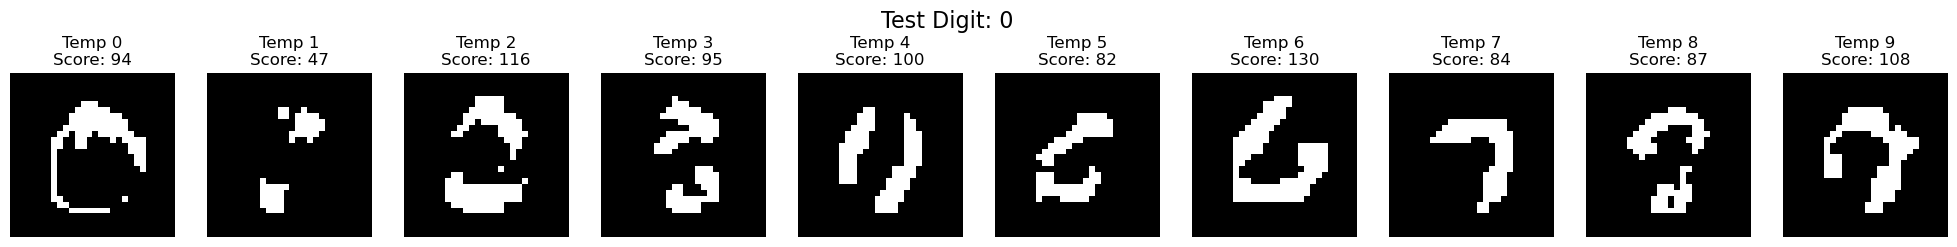

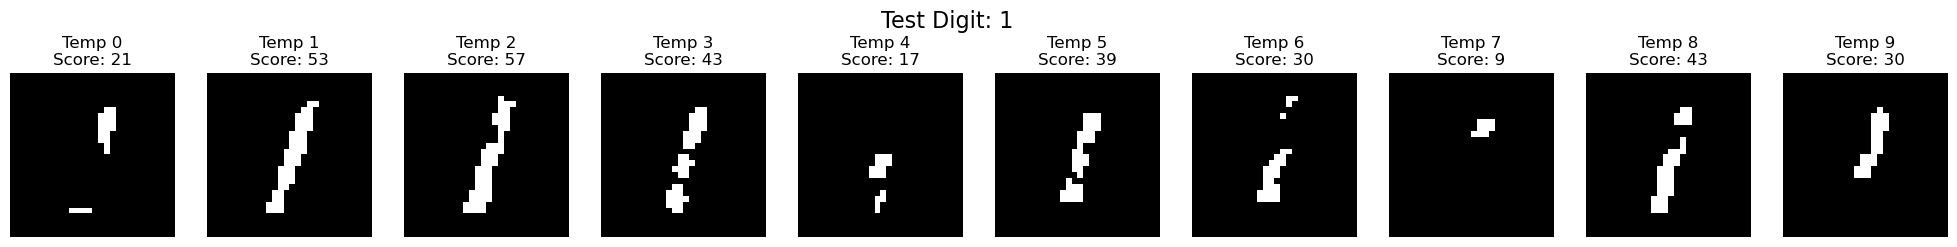

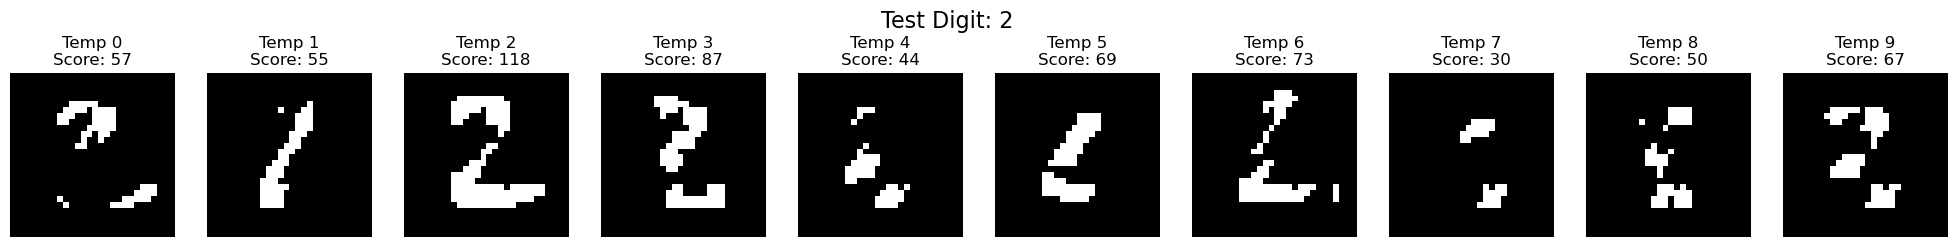

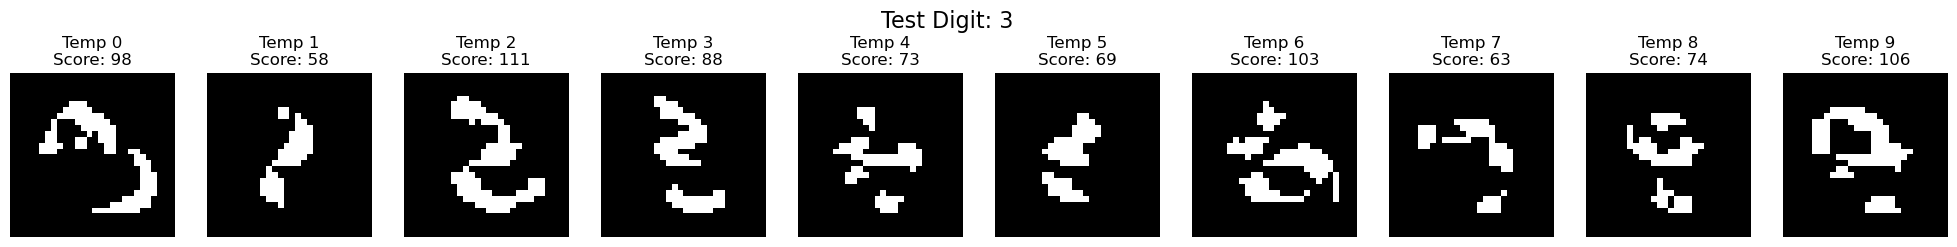

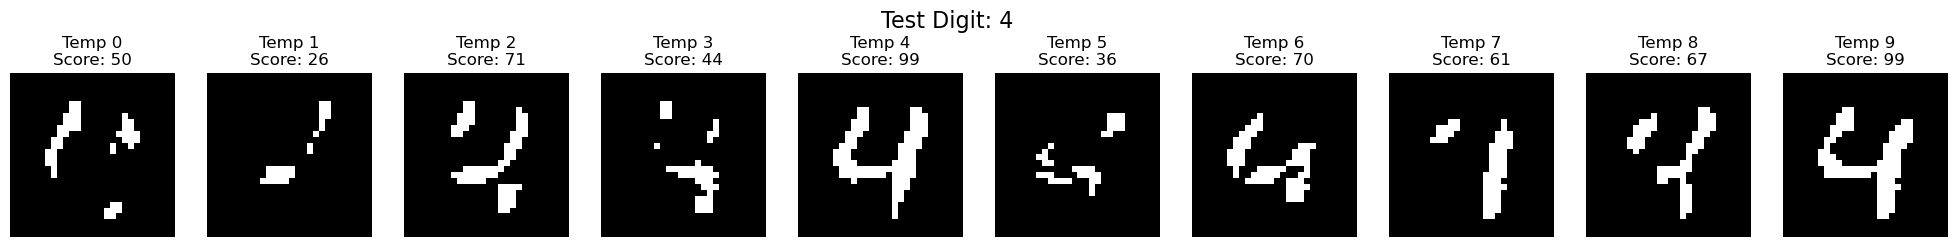

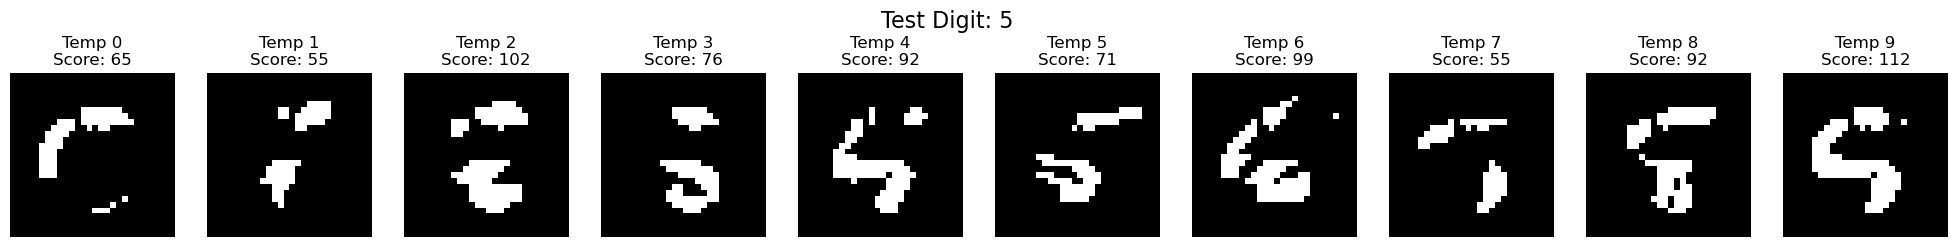

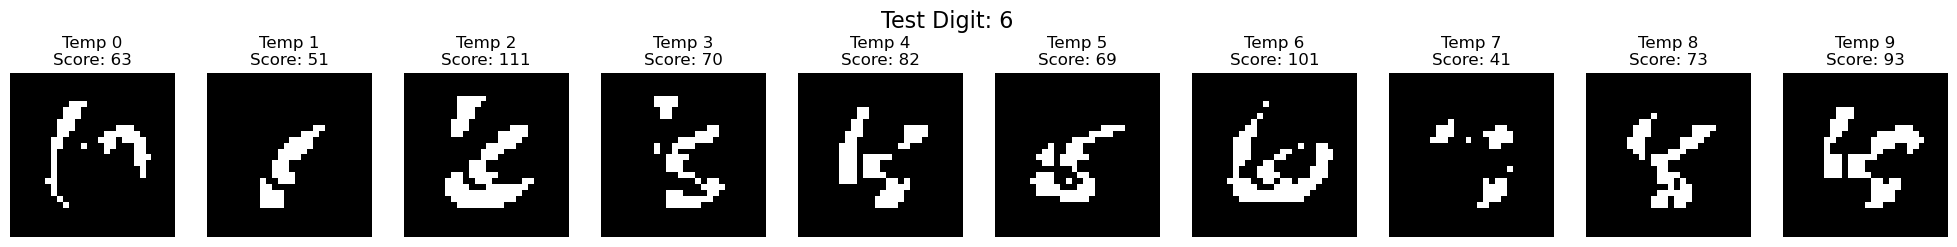

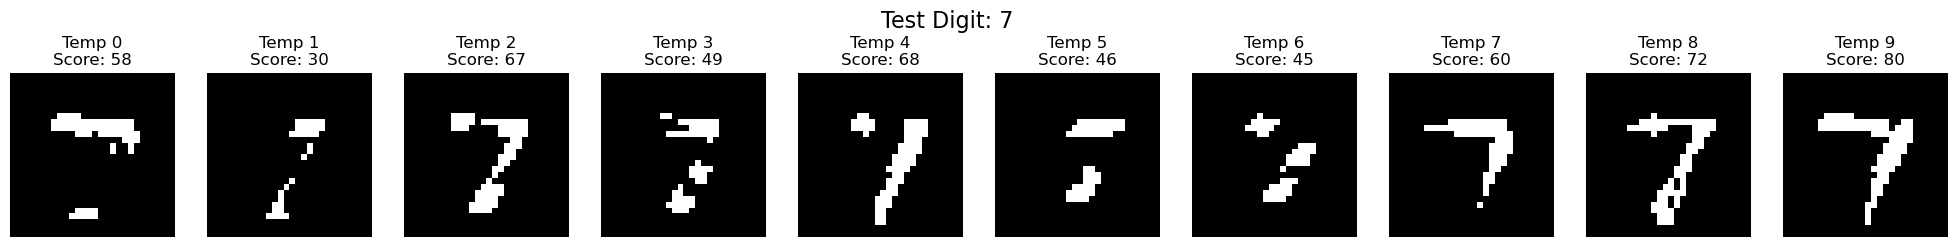

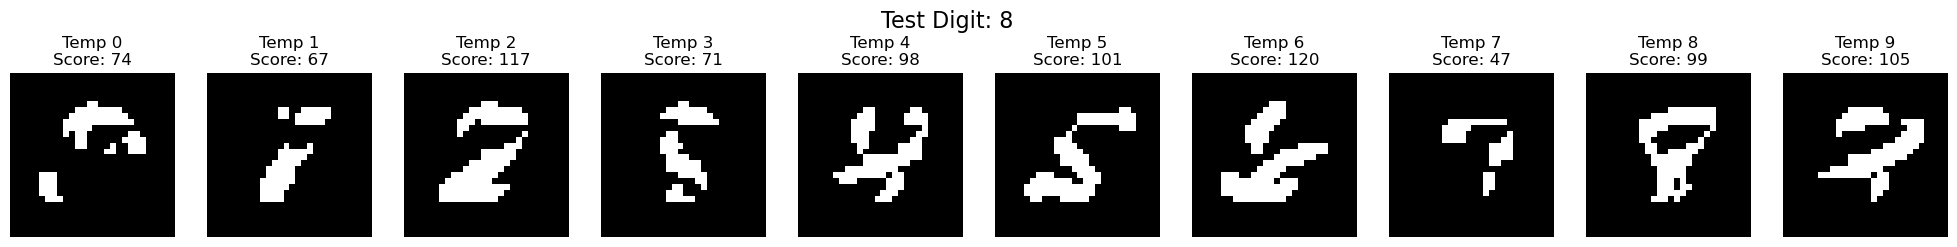

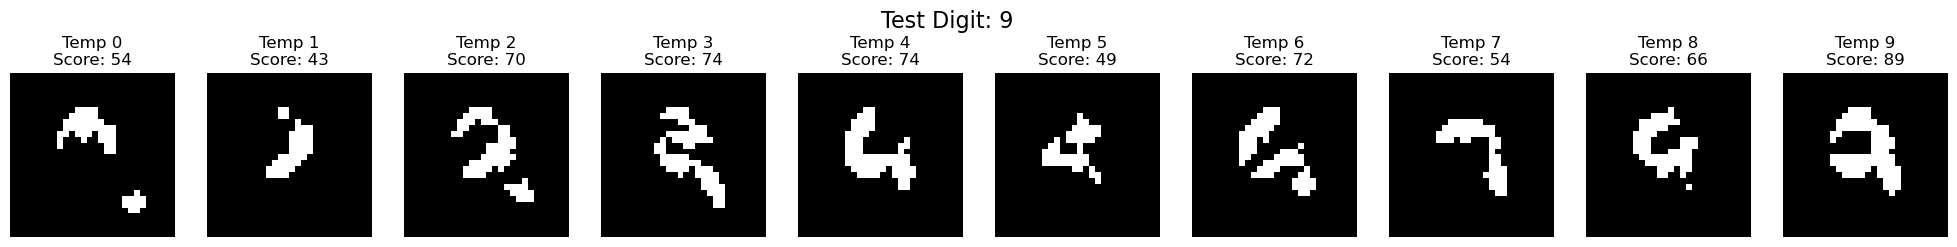

In [76]:
print("\n\nVisualizing one test image for each digit (0–9) against all templates (in order)...")

for true_label in range(10):
    # Get the first test image with the current true label
    test_sample =bin_test[bin_test['label']==true_label].iloc[0] # (label, image)
    test_img = test_sample[:-1]  # take image only (not include label) from test_sample
    scores = {}

    plt.figure(figsize=(25, 3))

    for digit in range(10):
        match_img = (template_images[digit].values & test_img.values).reshape(28,28)  # Image for overlapping areas
        score = np.sum(match_img)
        scores[digit] = score

        plt.subplot(1, 10, digit + 1)
        plt.imshow(match_img, cmap='gray')
        plt.title(f"Temp {digit}\nScore: {score}")
        plt.axis('off')

    plt.suptitle(f"Test Digit: {true_label}", fontsize=16)
    plt.show()


## Exercise (3) - Selecting Best templates.
(0.4 point)

In [77]:
print("Selecting best template per digit (within training set)...")

template_images = {}

for digit in range(10):
    # Extract rows that label is 'digit', and drop coloum 'label'.
    digit_data = bin_train [bin_train['label']==digit].drop(columns='label').reset_index(drop=True)
    digit_data = digit_data.iloc[:200]  # limit to 0~199th samples for performance
    best_avg_score = -1
    best_template = None

    for i in range(len(digit_data)):
        candidate = digit_data.iloc[i]
        total_score = 0

        for j in range(len(digit_data)):
            if i == j:
                continue
            comparison = digit_data.iloc[j]
            match = candidate & comparison
            score = np.sum(match)
            total_score += score

        avg_score = total_score / (len(digit_data) - 1)

        if avg_score > best_avg_score:
            best_avg_score = avg_score
            best_template = digit_data.iloc[i]

    template_images[digit] = best_template
    print(f"Digit {digit}: Best template selected with avg match score {best_avg_score:.2f}")

Selecting best template per digit (within training set)...
Digit 0: Best template selected with avg match score 178.48
Digit 1: Best template selected with avg match score 79.61
Digit 2: Best template selected with avg match score 133.13
Digit 3: Best template selected with avg match score 137.95
Digit 4: Best template selected with avg match score 120.13
Digit 5: Best template selected with avg match score 118.18
Digit 6: Best template selected with avg match score 141.35
Digit 7: Best template selected with avg match score 108.48
Digit 8: Best template selected with avg match score 161.20
Digit 9: Best template selected with avg match score 121.23


## Exercise (4) - Evaluate new templates
(0.2 point)

In [78]:
print("\nEvaluating new templates on test set...")

predictions = []

for idx, test_sample in bin_test.iterrows():
    test_img = test_sample[:-1].values.astype(np.uint8)  # label 제외
    max_score = -1
    predicted_label = -1
    
    for digit in range(10):
        template = template_images[digit]
        score = np.sum(np.bitwise_and(test_img, template))
        
        if score > max_score:
            max_score = score
            predicted_label = digit
            
    predictions.append(predicted_label)

# Accuracy evaluation
actual_labels = bin_test['label'].values  # 실제 정답
predictions = np.array(predictions)       # 예측 결과

accuracy = np.mean(predictions == actual_labels)
print("\nTotal accuracy on Test data is {:.4f}".format(accuracy))

# Per-class accuracy
class_correct = [0] * 10
class_total = [0] * 10

for i in range(len(actual_labels)):
    label = actual_labels[i]
    pred = predictions[i]
    class_total[label] += 1
    if pred == label:
        class_correct[label] += 1

print("\nPer-class Accuracy:")
for digit in range(10):
    if class_total[digit] > 0:
        acc = class_correct[digit] / class_total[digit]
        print(f"Digit {digit}: {acc:.4f} ({class_correct[digit]}/{class_total[digit]})")
    else:
        print(f"Digit {digit}: No samples")



Evaluating new templates on test set...

Total accuracy on Test data is 0.4807

Per-class Accuracy:
Digit 0: 0.9337 (915/980)
Digit 1: 0.4520 (513/1135)
Digit 2: 0.4225 (436/1032)
Digit 3: 0.3069 (310/1010)
Digit 4: 0.4287 (421/982)
Digit 5: 0.0673 (60/892)
Digit 6: 0.8372 (802/958)
Digit 7: 0.3444 (354/1028)
Digit 8: 0.8378 (816/974)
Digit 9: 0.1784 (180/1009)


## Exercise(5) – Visualizing Evaluate result of new templates - Result
(0.1 point)



Visualizing one test image for each digit (0–9) against all templates...


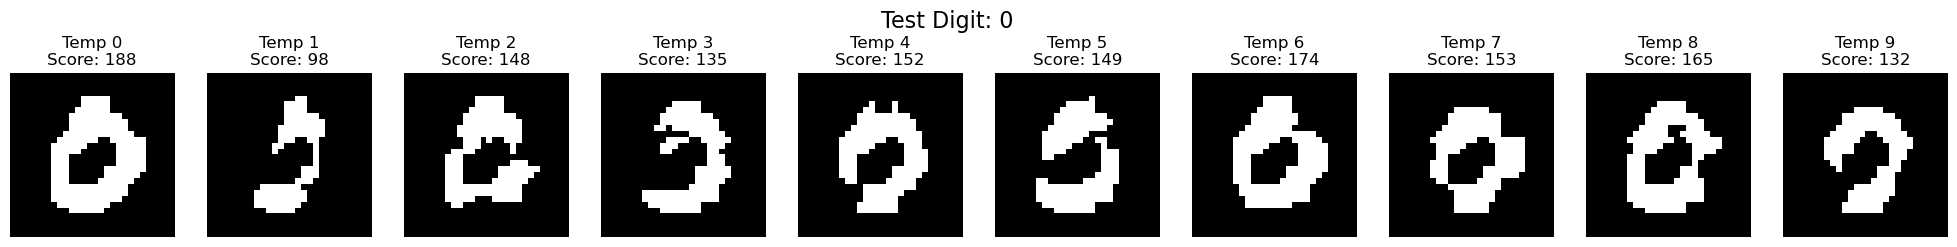

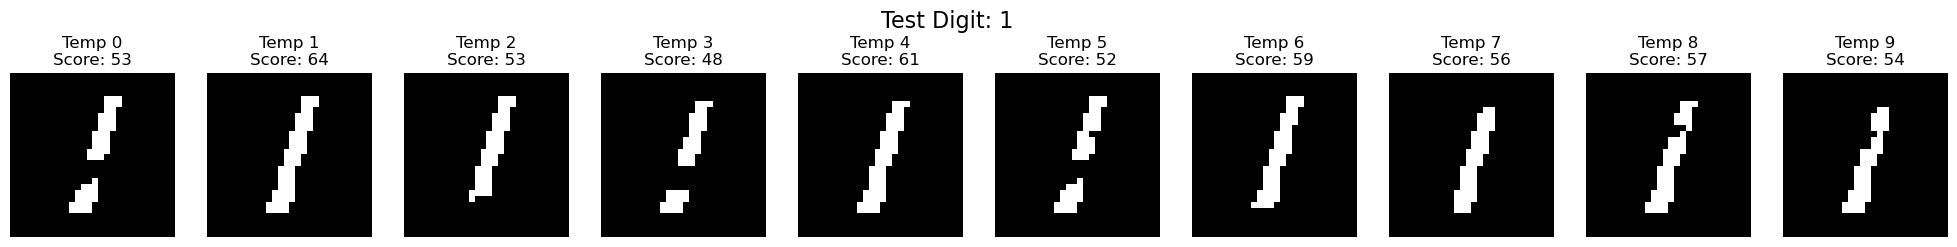

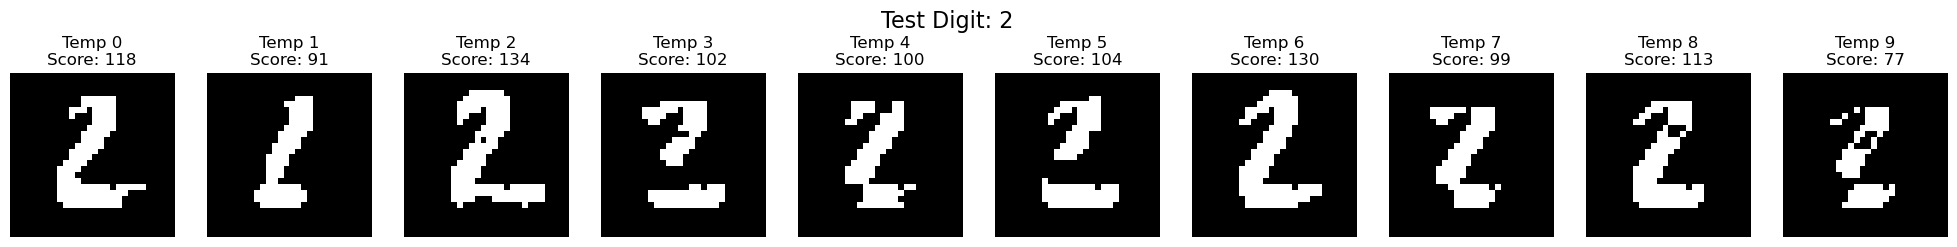

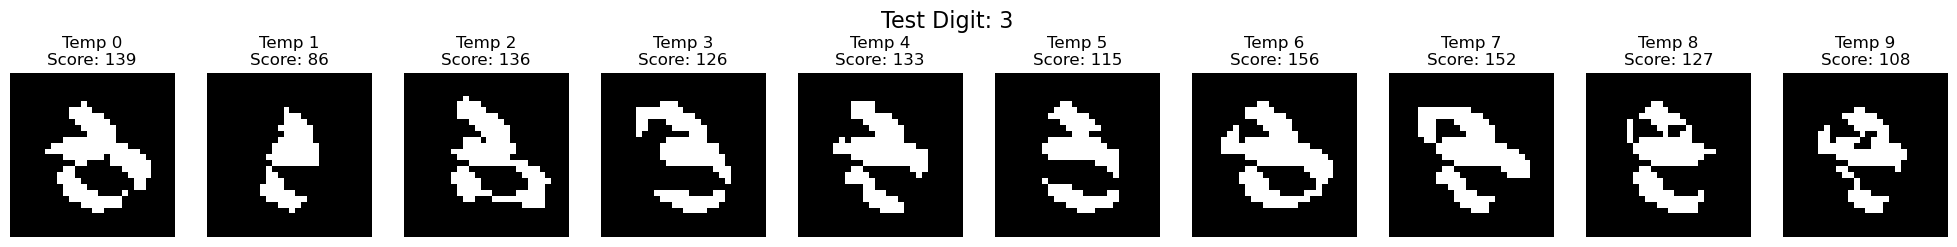

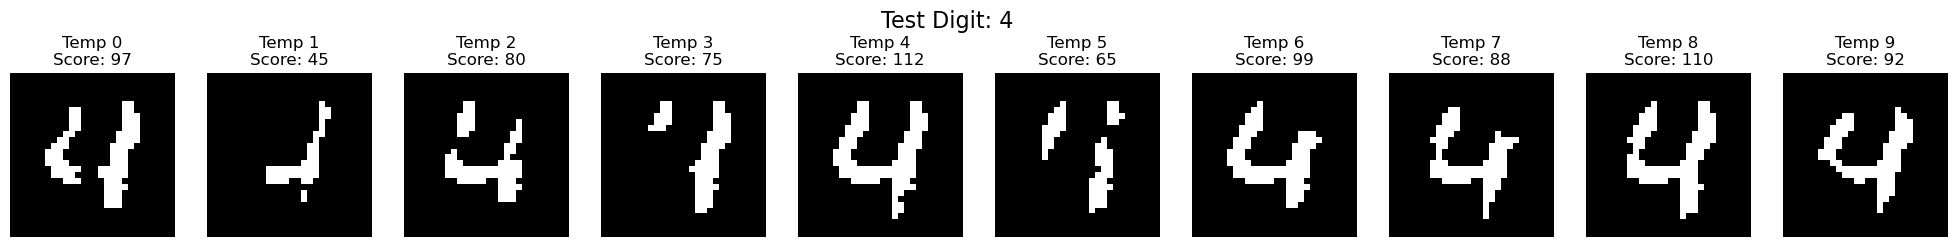

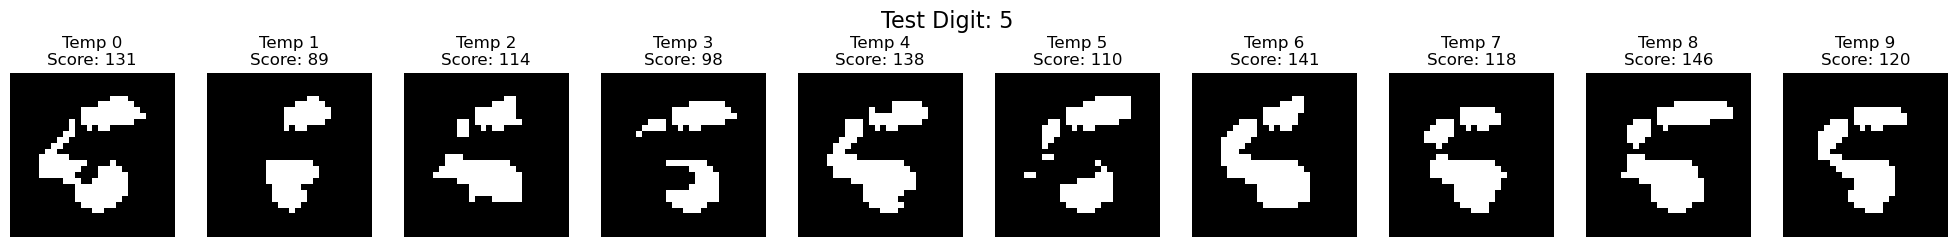

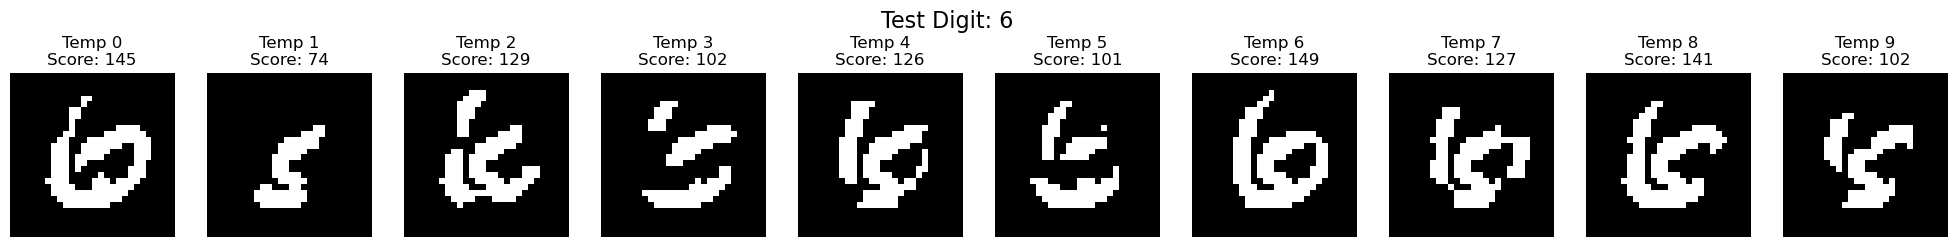

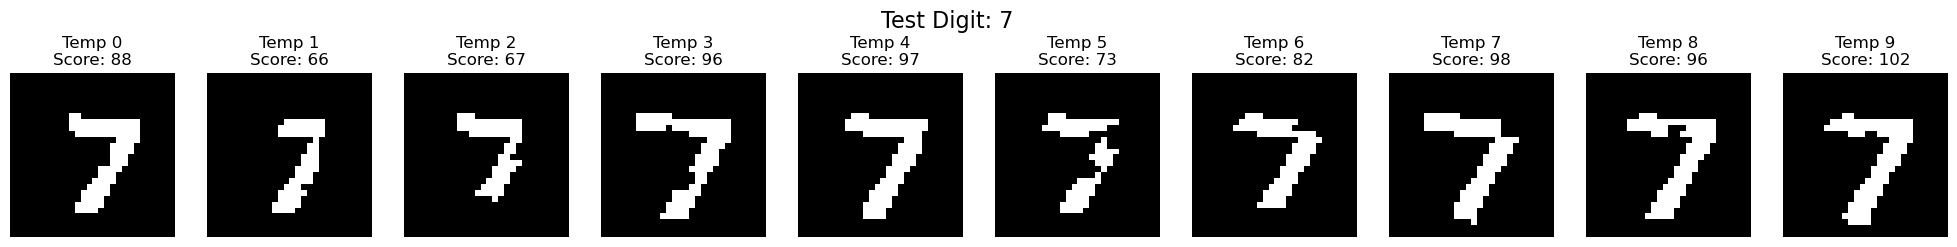

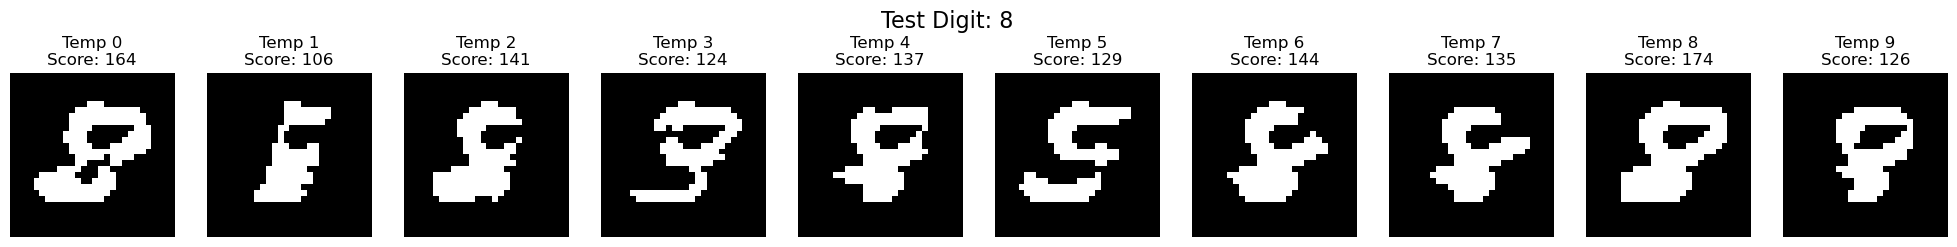

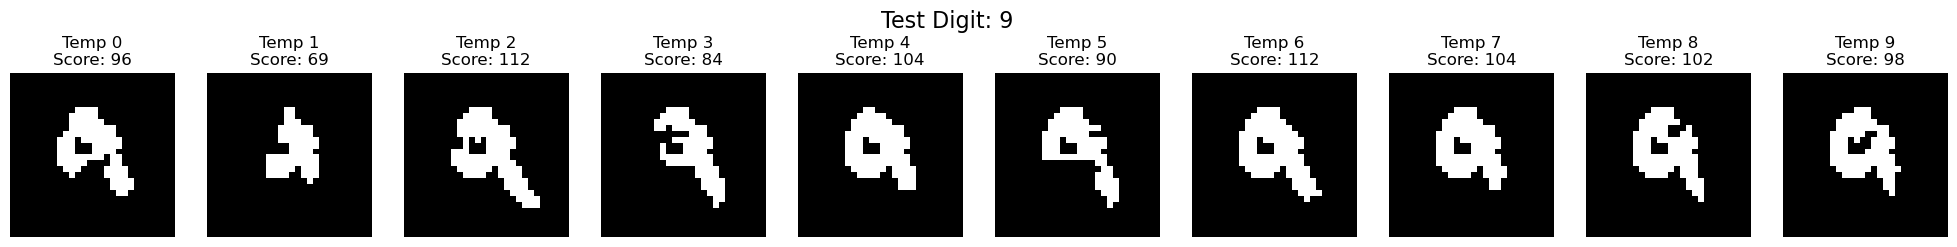

In [79]:
print("\n\nVisualizing one test image for each digit (0–9) against all templates...")

for true_label in range(10):
    test_sample = bin_test[bin_test['label'] == true_label].iloc[0]
    test_img = test_sample[:-1].values.astype(np.uint8)  # label 제외
    test_img = test_img.reshape(28, 28)  # 이미지를 28x28 형태로 reshape
    scores = {}

    plt.figure(figsize=(25, 3))

    for digit in range(10):
        # 템플릿 이미지를 numpy 배열로 변환하여 reshape
        template = np.array(template_images[digit]).reshape(28, 28).astype(np.uint8)  # 템플릿을 28x28로 reshape
        match_img = np.bitwise_and(test_img, template)  # 비트wise AND 연산
        score = np.sum(match_img)  # 매칭된 값의 합 (즉, 1의 개수)

        scores[digit] = score

        plt.subplot(1, 10, digit + 1)
        plt.imshow(match_img, cmap='gray')  # match_img를 28x28 이미지로 시각화
        plt.title(f"Temp {digit}\nScore: {score}")
        plt.axis('off')

    plt.suptitle(f"Test Digit: {true_label}", fontsize=16)
    plt.show()
